#This jupyter notebook is prepared by Brandon Gibbons

##1. Load Data and perform basic EDA 


###I. import libraries necessary libraries and perform necessariy nltk download operations


In [1]:
import pandas as pd
import nltk   
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

###II. As part of understanding how the columns are separated, read the file using the open function and create a list and show the first 10 items in the list

In [2]:
items = [line for line in open("/content/drive/MyDrive/Colab Notebooks/news.csv")]

print(len(items))
for item in items[:10]:
    print(item)
    print('\n')

44955
title	text	subject	date	target



As U.S. budget fight looms, Republicans flip their fiscal script	WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats a

###III. Based on your observation on how the data are separated, load the data set into pandas data frame and show the first 5 and last 5 rows


In [3]:
data=  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/news.csv", sep = '\t', header=0)

data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [4]:
data.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


###IV. See whether there are any null values and remove all the rows with any null values, and then show again that there are no more null values


In [5]:
data.isnull().mean().to_frame('nulls')

,nulls
title,0.0
text,0.0
subject,0.0
date,0.0
target,0.0


###V. Generate a counterplot to show the number of news in each subject


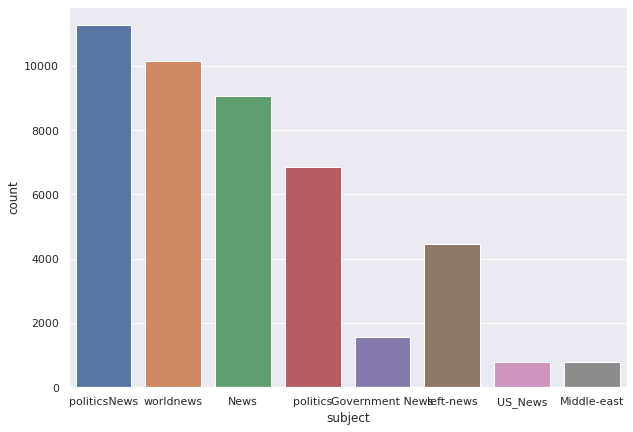

In [6]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 7)})
sns.countplot(x=data['subject'], data=data)

###VI. Generate a counterplot to show the number of news in each category (fake/ True)


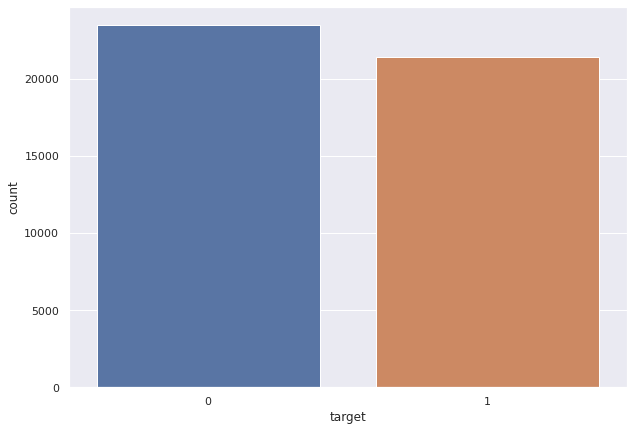

In [7]:
sns.countplot(x=data['target'], data=data)

###VII. Generate two word clouds, one for fake news and one for true news, and observe the most frequent words in each category and just write your observation on them.

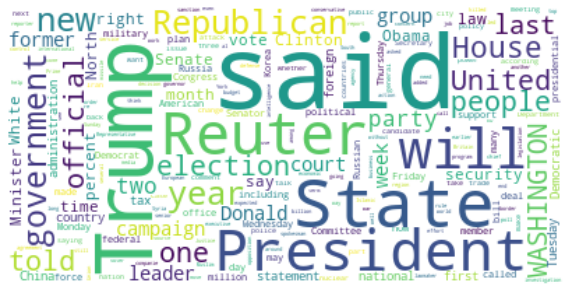

In [8]:
real = data.where(data['target'] == 1).dropna()
real_text = " ".join(text for text in real.text)

word_cloud_true = WordCloud(collocations=False, background_color='white').generate(real_text)
plt.imshow(word_cloud_true, interpolation='bilinear')
plt.axis('off')
plt.show()

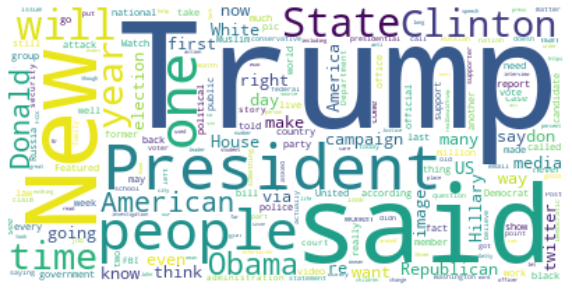

In [9]:
fake = data.where(data['target'] == 0, ).dropna()
fake_text = " ".join(text for text in fake.text)

word_cloud_fake = WordCloud(collocations=False, background_color='white').generate(fake_text)
plt.imshow(word_cloud_fake, interpolation='bilinear')
plt.axis('off')
plt.show()

###VIII. Create a column "AllText" that has the concatenated subject, title, and text [For example, for each news we have the subject, title, and text. We want a column that has all of this together as a large string]  [See the example answer with the majority vote in this link:

In [10]:
cols = ['subject', 'title', 'text']
data['AllText'] = data[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
data

,title,text,subject,date,target,AllText
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"politicsNews_As U.S. budget fight looms, Repub..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,politicsNews_U.S. military to accept transgend...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,politicsNews_Senior U.S. Republican senator: '...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,politicsNews_FBI Russia probe helped by Austra...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,politicsNews_Trump wants Postal Service to cha...
...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,Middle-east_McPain: John McCain Furious That I...
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,Middle-east_JUSTICE? Yahoo Settles E-mail Priv...
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,Middle-east_Sunnistan: US and Allied ‘Safe Zon...
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,Middle-east_How to Blow $700 Million: Al Jazee...


###IX. Using the dataframe's copy function, save the data frame into another dataframe so that you can use it later


In [11]:
copy = data.copy()

###X. Drop the title, text, subject, and date columns from the data frame as we will not use them separately. We have all the text in a single column that you have generated above


In [12]:
data.drop(labels = cols, axis=1, inplace=True)

###XI. Calculate the length of each text (I mean AllText column) and put them in a length column


In [13]:
data['length'] = data['AllText'].apply(len)
data.head()

,date,target,AllText,length
0,"December 31, 2017",1,"politicsNews_As U.S. budget fight looms, Repub...",4737
1,"December 29, 2017",1,politicsNews_U.S. military to accept transgend...,4155
2,"December 31, 2017",1,politicsNews_Senior U.S. Republican senator: '...,2863
3,"December 30, 2017",1,politicsNews_FBI Russia probe helped by Austra...,2534
4,"December 29, 2017",1,politicsNews_Trump wants Postal Service to cha...,5287


###XII. Plot two histograms to see the distribution of the lengths. One for fake news and one for true news. Write in words about the plots


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bd5f40950>,
      dtype=object)

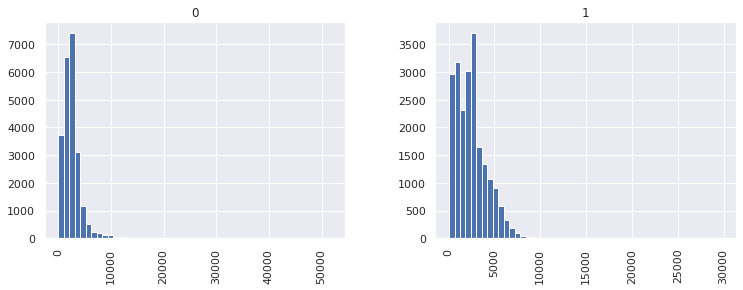

In [14]:
data.hist(column='length', by='target', bins=50, figsize=(12,4))

###XIII. Write in Words: What is TFIDF? How to create bag of words using sklearn? And how to generate TFIDF for the bag of words?


####TF-IDF is a statistic that reflects how important a word is to a document from a collection.   Using sklearn you would first pre-process the text, extract unique words, then calculate BOW representation. You would then apply the TfidVectorizor to the collection.

##2. Train Test Split


###I. Import related libraries and perform train test split. Keep 20% data in the test set


In [15]:
from sklearn.model_selection import train_test_split

X = data['AllText']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

###II. Using a count plot show how many real and fake news do we have in the training set and how many in the test set


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


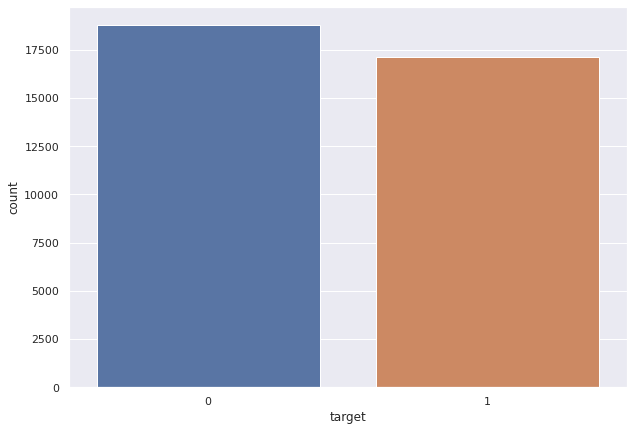

In [16]:
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


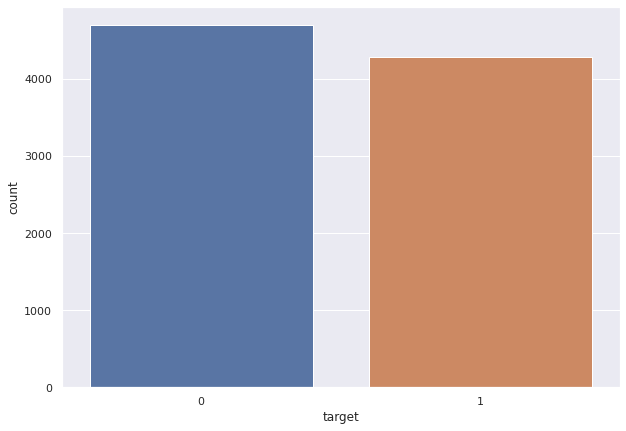

In [17]:
sns.countplot(y_test)

##3. Training and Testing Fake news classifier using MultinomialNB


###I. Create a pipeline that will use countVectorizer with the function you have created earlier for data preprocessing, then use Tftransformer and then use the NaiveBayes classifier


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer 
import string
stemmer = LancasterStemmer()

def text_process(mess):
    stopwordList = stopwords.words('english')

    # Check characters to see if they are in punctuation
    mess = [char for char in mess if char not in string.punctuation]
     # Join the characters again to form the string.
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words


pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer=text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
                    ])

###II. Fit the pipeline and then perform prediction


In [19]:
import nltk
nltk.download('wordnet') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

###III. Generate classification report and confusion matrix (you have to achieve at least 96% accuracy for the test set to receive full credit)


In [21]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4698
           1       0.95      0.95      0.95      4282

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



###IV.Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.


####Overall, the model has 96% accuracy and very high precision, recall, and f-1 score. This means it is good at predicting true positives and true negatives.

###V. Copy a part of any news of your choice from a news website and then use the model to predict whether is it true or not. 

In [22]:
article = "politicNews_Trump allies' secret work to overturn 2020 election detailed in new text messages_A new tranche of text messages published Monday between former White House chief of staff Mark Meadows and allies of former President Donald Trump, sent in the months after the 2020 election, offers new insight into the efforts to overturn Joe Biden's election victory. The text messages, which were obtained by CNN, help illuminate how far the Trump White House and its allies secretly tried to go to overturn the 2020 election, including failed efforts by Meadows to contact Georgia Secretary of State Brad Raffensperger. Meadows provided the 2,319 text messages to the House committee investigating the Jan. 6 attack on the U.S. Capitol. CNN did not say how it obtained the messages, some of which were published on its website. NBC News has not been able to independently confirm all of the text messages. The Jan. 6 committee refused to confirm the veracity of the texts or to comment on them. NBC News has also reached out to those who sent or received texts, including a representative for Meadows, and has not received responses from most of them. The text messages offer another glimpse into the inner workings of the White House after Trump lost the 2020 election and then as the Jan. 6 riot unfolded. Publicly, Trump and his allies were working to overturn his election defeat by persuading state officials in places like Georgia and Arizona to negate the will of their voters, but behind closed doors the effort was even more frantic. The messages also show how efforts to substantiate conspiracy theories that were fomented on the internet were circulating in the White House and fixating Trump himself."
pipeline.predict([article])


array([1])

##4. Training and Testing a Deep Neural Network


###I. Import related library for using MLPClassifier from sklearn neural netowrk.


In [23]:
from sklearn.neural_network import MLPClassifier

###II. Create a pipeline like 3i, for MLPClassfier you should use at least two layers and also should verbose = 2 (you can use other parameters as you wish or use the one you see from the uploaded google colab)


In [24]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,3), random_state=0, early_stopping=True, verbose=2)),  # train on TF-IDF vectors w/ MLPClassifier classifier with two hidden layers
])

###III. Fit the pipeline and then perform prediction


In [25]:
pipeline2.fit(X_train, y_train)

Iteration 1, loss = 0.34927515
Validation score: 0.983575
Iteration 2, loss = 0.03901967
Validation score: 0.995267
Iteration 3, loss = 0.01258212
Validation score: 0.995824
Iteration 4, loss = 0.00649859
Validation score: 0.996102
Iteration 5, loss = 0.00429838
Validation score: 0.996102
Iteration 6, loss = 0.00325662
Validation score: 0.996381
Iteration 7, loss = 0.00269816
Validation score: 0.996102
Iteration 8, loss = 0.00235360
Validation score: 0.996102
Iteration 9, loss = 0.00211061
Validation score: 0.996102
Iteration 10, loss = 0.00192604
Validation score: 0.996102
Iteration 11, loss = 0.00177891
Validation score: 0.996102
Iteration 12, loss = 0.00165443
Validation score: 0.996102
Iteration 13, loss = 0.00154746
Validation score: 0.996381
Iteration 14, loss = 0.00145350
Validation score: 0.996102
Iteration 15, loss = 0.00136892
Validation score: 0.996381
Iteration 16, loss = 0.00129263
Validation score: 0.996381
Iteration 17, loss = 0.00122260
Validation score: 0.996659
Iterat

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f7bd5efc950>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 3),
                               random_state=0, verbose=2))])

In [26]:
predictions = pipeline2.predict(X_test)

###IV. Generate classification report and confusion matrix (You have to achieve at least 99% accuracy to receive full credit for this model)

In [27]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4689
           1       1.00      0.99      1.00      4291

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



###V. Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.


####Overall, the model has 99.6% accuracy and very high precision, recall, and f-1 score. This means it is good at predicting true positives and true negatives.

###VII. Use the same news you have used above and then use the model to predict whether is it true or not. 


In [28]:
pipeline2.predict([article])

array([0])

###VII. Discuss any difference in performance between this model and NB model


####MLPclassifier relies on a neural network, it performed slightly better on training sets.